In [1]:
# using NN to train the model

In [2]:
# to change the data into the right format
def transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    for i in range(len(series)-window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    # reshape each 
    
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return X,y

In [3]:
# normalise the data that will be used to train the model
from pandas import Series
import numpy as np
import pandas as pd
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
series = pd.to_numeric(series,errors='coerce')
series = series.dropna(axis=0)
window_size = 7
series = series.tolist()
mean_series = np.mean(series)
series = (series-mean_series)/mean_series

X,y = transform_series(series = series,window_size = window_size)

In [9]:
# to train the modelling using NN
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
clf = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='lbfgs', alpha=0.00001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
scores = cross_val_score(clf, X, y, cv=10)
scores 
# The mean score and the 95% confidence interval of the score estimate are given as follows
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F:\anaconda\envs\individual-project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\envs\individual-project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\envs\individual-project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\envs\individual-project\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: D

Accuracy: 0.85 (+/- 0.08)


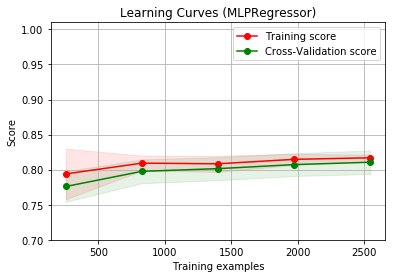

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-Validation score")

    plt.legend(loc="best")
    return plt

from sklearn.neural_network import MLPRegressor
title = "Learning Curves (MLPRegressor)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = MLPRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()